# JUN 작업 파일

## 파일 로드 및 확인

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import math
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback
from keras.models import Sequential
from keras.layers import Dense


# 데이터 불러오기
df = pd.read_csv('C:/Users/galaxy/Desktop/2023/JB_Data/loan_customer.csv')
# 데이터 기본 정보 확인
df.info()    # 데이터 정보 출력 (데이터 타입, 누락값 확인)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24000 non-null  int64  
 1   NAME_CONTRACT_TYPE          24000 non-null  object 
 2   CODE_GENDER                 16906 non-null  object 
 3   FLAG_OWN_REALTY             14429 non-null  object 
 4   CNT_CHILDREN                24000 non-null  int64  
 5   AMT_INCOME_TOTAL            24000 non-null  float64
 6   AMT_CREDIT                  16700 non-null  float64
 7   NAME_INCOME_TYPE            24000 non-null  object 
 8   NAME_EDUCATION_TYPE         24000 non-null  object 
 9   NAME_FAMILY_STATUS          24000 non-null  object 
 10  NAME_HOUSING_TYPE           24000 non-null  object 
 11  REGION_POPULATION_RELATIVE  16851 non-null  float64
 12  DAYS_BIRTH                  19251 non-null  float64
 13  DAYS_EMPLOYED               168

In [19]:
column_info = {'SK_ID_CURR':'대출식별번호',
'NAME_CONTRACT_TYPE':'계약유형',
'CODE_GENDER':'성별',
'FLAG_OWN_REALTY':'자가부동산보유여부',
'CNT_CHILDREN':'자녀수',
'AMT_INCOME_TOTAL':'소득금액(USD)',
'AMT_CREDIT':'신용대출금액(USD)',
'NAME_INCOME_TYPE':'소득유형',
'NAME_EDUCATION_TYPE':'학력',
'NAME_FAMILY_STATUS':'결혼상태',
'NAME_HOUSING_TYPE':'주거형태',
'REGION_POPULATION_RELATIVE':'거주지역의표준화된인구',
'DAYS_BIRTH':'대출신청시점에서의일단위나이(기준시점대비상대적인시간)',
'DAYS_EMPLOYED':'대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)',
'DAYS_REGISTRATION':'대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)',
'DAYS_ID_PUBLISH':'대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)',
'FLAG_MOBIL':'휴대폰번호등록여부',
'FLAG_EMP_PHONE':'고용주연락처등록여부',
'FLAG_WORK_PHONE':'직장전화번호등록여부',
'FLAG_PHONE':'집전화번호등록여부',
'FLAG_EMAIL':'이메일주소등록여부',
'REGION_RATING_CLIENT':'거주지등급',
'WEEKDAY_APPR_PROCESS_START':'대출신청요일',
'HOUR_APPR_PROCESS_START':'대출신청시간대',
'REG_CITY_NOT_LIVE_CITY':'고객의등록지주소와실거주지일치여부',
'REG_CITY_NOT_WORK_CITY':'고객의등록지주소와직장주소일치여부',
'LIVE_CITY_NOT_WORK_CITY':'고객의실거주지와직장주소일치여부',
'ORGANIZATION_TYPE':'근무회사유형',
'FLAG_DOCUMENT_2':'문서2제공여부',
'FLAG_DOCUMENT_3':'문서3제공여부',
'FLAG_DOCUMENT_4':'문서4제공여부',
'CB_SCORE_1':'신용점수1',
'CB_SCORE_2':'신용점수2',
'CB_SCORE_3':'신용점수3',
'TARGET':'연체여부'}

In [20]:

df_colinfo = df.copy() 

for col in df_colinfo.columns : 
    df_colinfo.rename(columns = {col:column_info[col]}, inplace = True)
    print(col+'컬럼의 이름을 '+column_info[col]+'로 수정했습니다 ')

SK_ID_CURR컬럼의 이름을 대출식별번호로 수정했습니다 
NAME_CONTRACT_TYPE컬럼의 이름을 계약유형로 수정했습니다 
CODE_GENDER컬럼의 이름을 성별로 수정했습니다 
FLAG_OWN_REALTY컬럼의 이름을 자가부동산보유여부로 수정했습니다 
CNT_CHILDREN컬럼의 이름을 자녀수로 수정했습니다 
AMT_INCOME_TOTAL컬럼의 이름을 소득금액(USD)로 수정했습니다 
AMT_CREDIT컬럼의 이름을 신용대출금액(USD)로 수정했습니다 
NAME_INCOME_TYPE컬럼의 이름을 소득유형로 수정했습니다 
NAME_EDUCATION_TYPE컬럼의 이름을 학력로 수정했습니다 
NAME_FAMILY_STATUS컬럼의 이름을 결혼상태로 수정했습니다 
NAME_HOUSING_TYPE컬럼의 이름을 주거형태로 수정했습니다 
REGION_POPULATION_RELATIVE컬럼의 이름을 거주지역의표준화된인구로 수정했습니다 
DAYS_BIRTH컬럼의 이름을 대출신청시점에서의일단위나이(기준시점대비상대적인시간)로 수정했습니다 
DAYS_EMPLOYED컬럼의 이름을 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_REGISTRATION컬럼의 이름을 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_ID_PUBLISH컬럼의 이름을 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
FLAG_MOBIL컬럼의 이름을 휴대폰번호등록여부로 수정했습니다 
FLAG_EMP_PHONE컬럼의 이름을 고용주연락처등록여부로 수정했습니다 
FLAG_WORK_PHONE컬럼의 이름을 직장전화번호등록여부로 수정했습니다 
FLAG_PHONE컬럼의 이름을 집전화번호등록여부로 수정했습니다 
FLAG_EMAIL컬럼의 이름을 이메일주소등록여부로 수정했습니다 
REGION_RATING_CLIENT컬럼의 이름을 거주지등급로 수정했습니다 
WEEKDAY_APPR_PROCESS_START

In [21]:
df_colinfo.describe()
df_colinfo.head()       # 데이터 상위 몇 개 행 출력
# 결측치 확인
print("결측치가 있는 행의 수는",len(df_colinfo),"중",len(df_colinfo[df_colinfo.isnull().any(axis=1)]))
# 대부분의 행이 결측치가 있음
missing_values = df_colinfo.isnull().sum()
missing_values[missing_values > 0 ]

결측치가 있는 행의 수는 24000 중 23562


성별                                         7094
자가부동산보유여부                                  9571
신용대출금액(USD)                                7300
거주지역의표준화된인구                                7149
대출신청시점에서의일단위나이(기준시점대비상대적인시간)               4749
대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)             7149
대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)    9733
대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)     4741
신용점수1                                      6146
신용점수2                                      8274
신용점수3                                      7108
dtype: int64

## 변수 편집

In [22]:
data = df.copy()

### 1. 변수 범주화

In [23]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH']/360
data['DAYS_BIRTH'] = data['DAYS_BIRTH']*-1

data['DAYS_BIRTH'] = data['DAYS_BIRTH'].apply(lambda x: math.ceil(x) if not np.isnan(x) else np.nan)
data['DAYS_BIRTH']

0        27.0
1        53.0
2        36.0
3        32.0
4         NaN
         ... 
23995    54.0
23996    34.0
23997     NaN
23998    39.0
23999    36.0
Name: DAYS_BIRTH, Length: 24000, dtype: float64

### 2. 변수 결측치 채우기

#### 1. 이상치 처리
- #### 이상값 모두 결측치로 통일하여 처리

In [24]:
#data = data.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)
data = df.copy()
# data = data.replace(['XNA'], np.nan)

- 최종 결측치 컬럼 확인

In [25]:
# 결측값이 있는 행 선택하기
col_mv_list = data.columns[data.isnull().any()]

for column in col_mv_list:
    print(f"- {column} {column_info[column]}")

- CODE_GENDER 성별
- FLAG_OWN_REALTY 자가부동산보유여부
- AMT_CREDIT 신용대출금액(USD)
- REGION_POPULATION_RELATIVE 거주지역의표준화된인구
- DAYS_BIRTH 대출신청시점에서의일단위나이(기준시점대비상대적인시간)
- DAYS_EMPLOYED 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
- DAYS_REGISTRATION 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
- DAYS_ID_PUBLISH 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)
- CB_SCORE_1 신용점수1
- CB_SCORE_2 신용점수2
- CB_SCORE_3 신용점수3


#### 2. 패턴을 찾아 채우기

In [26]:
from scipy import stats
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            mode_result = stats.mode(df[col])
            fill_value = mode_result.mode[0]
           
        elif fill_method == 'median':
            fill_value = df[col].median()
       
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
           
        df[col] = df[col].fillna(fill_value)
    return df

In [27]:
# 결측치가 한개인 컬럼은 최빈값으로 대체

data = data.replace(['Unknown'], np.nan)

fill_methods = {

    'NAME_FAMILY_STATUS': 'mode',

}

data = replace_missing_values(data,fill_methods)
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

C:\Users\galaxy\AppData\Local\Temp\ipykernel_20944\1735547379.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(df[col])
C:\Users\galaxy\AppData\Local\Temp\ipykernel_20944\1735547379.py:5: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_result = stats.mode(df[col])


['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

In [28]:
data.loc[data['FLAG_EMP_PHONE'] == 0, [ 'DAYS_EMPLOYED']] = 365243.0

data.loc[data['DAYS_EMPLOYED'] == 365243.0, [ 'DAYS_EMPLOYED']]  = 0


### 변수 타입 변경

In [29]:
data = data.astype({'FLAG_MOBIL': object, 'FLAG_EMP_PHONE': object , 'FLAG_WORK_PHONE': object, 'FLAG_PHONE': object, 'FLAG_EMAIL': object
                   , 'REG_CITY_NOT_LIVE_CITY': object , 'REG_CITY_NOT_WORK_CITY': object, 'LIVE_CITY_NOT_WORK_CITY': object, 'FLAG_DOCUMENT_2': object
                   , 'FLAG_DOCUMENT_3': object , 'FLAG_DOCUMENT_4': object })

#### 3. 딥러닝 방식

#### 딥러닝 Input 데이터 분류

In [30]:
def columns_classification(data):
    # 주어진 데이터를 수치형, 범주형, 결측치가 있는 컬럼으로 분류하여 뱉어냄.
    
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0].index.to_list()

    numeric_columns = numeric_columns.to_list()
    numeric_columns = [x for x in numeric_columns if x not in missing_values]
    numeric_columns

    categorical_columns = categorical_columns.to_list()
    categorical_columns = [x for x in categorical_columns if x not in missing_values]
    categorical_columns    
    print('total_columns : ' + str(len(data.columns)))
    
    print('numeric_columns : ' + str(len(numeric_columns)))
    print(numeric_columns)
    print('categorical_columns : '+ str(len(categorical_columns)))
    print(categorical_columns)
    print('missing_values : '+ str(len(missing_values)))
    print(missing_values)
    return numeric_columns,categorical_columns,missing_values
    
    

In [31]:
numeric_columns,categorical_columns,missing_values = columns_classification(data)

total_columns : 35
numeric_columns : 6
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 18
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4']
missing_values : 11
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']


## 딥러닝 예측함수 정의

### 범주형 맞출때

In [32]:
def fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=30, batch_size_val=32 ):
    
    # 결측치 있는 데이터 준비
    data_with_missing = data.copy()

    # 결측치 채우기를 위한 데이터 준비
    target_column = target_col_val  # 채울 결측치가 있는 컬럼명
    input_numeric_columns = numeric_columns[1:]

    # 성별 전용
    if target_col_val == 'CODE_GENDER':
        data_with_missing.loc[data_with_missing['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = np.nan
    if target_col_val == 'ORGANIZATION_TYPE':
        data_with_missing.loc[data_with_missing['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = np.nan
        
    # 결측치가 없는 데이터 추출 추후 행 인덱스
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    # 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
    missing_data_index = data_with_missing[target_column].isnull()



    # 범주형 변수 인코딩
    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()
    
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_numeric_data = scaler.fit_transform(data_with_missing[input_numeric_columns])

    # 모든 입력 데이터 결합
    input_data_encoded = np.hstack((scaled_numeric_data, categorical_data_encoded))
    len(input_data_encoded)

    print(len(input_data_encoded))

    train_data_scaled = input_data_encoded[data_with_missing[target_column].notnull()]


    # 결측치를 채울 Autoencoder 모델 구성
    input_dim = input_data_encoded.shape[1]
    
    output_dim = data_with_missing[target_col_val].nunique()
    print(output_dim)

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(65, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout 추가
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),  # Dropout 추가
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(output_dim, activation='softmax')  # 선형 활성화 함수 사용
    ])

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    # 타겟 컬럼 추후 원래 레이블으로 표기하기 위함

    # LabelEncoder 객체 생성 및 학습
    encoder_target = LabelEncoder()
    encoder_target.fit(no_missing_data[target_column])
    integer_encoded_labels = encoder_target.transform(no_missing_data[target_column])
    integer_encoded_labels



    one_hot_train_labels = to_categorical(integer_encoded_labels)

    # 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, one_hot_train_labels, test_size=0.2, random_state=42)

    # 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 모델 훈련
    model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs_val, batch_size=batch_size_val, verbose=2, callbacks=[early_stopping_cb])
    

    
    missing_data = input_data_encoded[data_with_missing[target_column].isnull()]
    print(len(missing_data))
    print(len(missing_data[0]))

    # 훈련된 모델로 결측치 예측 및 채우기
    predicted_values = model.predict(missing_data)
    filled_values = predicted_values.squeeze()


    original_label=np.argmax(filled_values, axis=1)
    predicted_labels_string = encoder_target.inverse_transform(original_label)

    # 결측치를 채워 넣음
    data_with_fill = data_with_missing.copy()
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = predicted_labels_string


    print(data_with_fill.loc[missing_data_index, target_column].head())
    return data_with_fill
    

### 수치형 맞출떄

In [33]:
def fill_numeric(data, numeric_columns, categorical_columns, target_col_val='CB_SCORE_2' ,epochs_val=30, batch_size_val=32 ):

    # 결측치 있는 데이터 준비
    data_with_missing = data.copy()

    # 결측치 채우기를 위한 데이터 준비
    target_column = target_col_val  # 채울 결측치가 있는 컬럼명
    input_numeric_columns = numeric_columns[1:]

    # 결측치가 없는 데이터 추출 추후 행 인덱스
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    # 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
    missing_data_index = data_with_missing[target_column].isnull()


    # 범주형 변수 인코딩
    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()
    
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_numeric_data = scaler.fit_transform(data_with_missing[input_numeric_columns])

    # 모든 입력 데이터 결합
    input_data_encoded = np.hstack((scaled_numeric_data, categorical_data_encoded))
    len(input_data_encoded)


    print(len(input_data_encoded))

    train_data_scaled = input_data_encoded[data_with_missing[target_column].notnull()]


    print(len(train_data_scaled))

    # 결측치를 채울 Autoencoder 모델 구성
    input_dim = input_data_encoded.shape[1]




    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(65, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # 선형 활성화 함수 사용
    ])

    model.compile(optimizer='adam',
          loss='mean_squared_error',
          metrics=['mean_squared_error'])


    # Prepare target data
    target_data = no_missing_data[target_column].values.reshape(-1, 1)
    # Scale target data using a new scaler
    target_scaler = StandardScaler()
    target_data_scaled = target_scaler.fit_transform(target_data)

    # 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, target_data_scaled, test_size=0.2, random_state=42)

    # 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 모델 훈련
    model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs_val, batch_size=batch_size_val,  verbose=2,callbacks=[early_stopping_cb])


    missing_data = input_data_encoded[data_with_missing[target_column].isnull()]
    
    print(len(missing_data))
    print(len(missing_data[0]))

    # 훈련된 모델로 결측치 예측 및 채우기
    predicted_values = model.predict(missing_data)
    predicted_values_orgin = target_scaler.inverse_transform(predicted_values)
    filled_values = predicted_values_orgin.squeeze()


    # 결측치를 채워 넣음
    data_with_fill = data_with_missing.copy()
    
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = filled_values
    data_with_fill.loc[missing_data_index, target_column]


    # 그래프로 분포가 어떻게 그려지는지 한번 확인함.

    result = data_with_fill.loc[missing_data_index, target_column]
    OG_result = data_with_fill.loc[:, target_column]

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns

    result.hist(bins=30, ax=axs[0])  
    axs[0].set_title("Predict "+result.name)
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')

    OG_result.hist(bins=30, ax=axs[1])  
    axs[1].set_title("Origin "+OG_result.name)
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust the padding between and around the subplots.
    plt.show()

    return data_with_fill
    

#### 결측치 채우기

- 데이터를 채우면서, 예측값 여부 컬럼을 추가적으로 생성함
- 예측한 컬럼을 다음예측에 사용했을 경우, 큰 차이는 없음

total_columns : 35
numeric_columns : 6
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 18
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4']
missing_values : 11
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
2
Epoch 1/30
423/423 - 1s - loss: 0.6761 - accuracy: 0.6587 - val_loss: 0.6375 - val_accuracy: 0.6625 - 1s/epoch - 3ms/step
Epoch 2/30
423/423 - 1s - loss: 0.6262 - accuracy: 0.6713 - val_loss: 0.6010 - val_accuracy: 0.6886 - 699ms

Epoch 10/32
418/418 - 1s - loss: 1.3267 - mean_squared_error: 1.3075 - val_loss: 0.8371 - val_mean_squared_error: 0.8180 - 962ms/epoch - 2ms/step
Epoch 11/32
418/418 - 1s - loss: 0.8030 - mean_squared_error: 0.7840 - val_loss: 0.8499 - val_mean_squared_error: 0.8313 - 946ms/epoch - 2ms/step
Epoch 12/32
418/418 - 1s - loss: 0.8017 - mean_squared_error: 0.7833 - val_loss: 0.8336 - val_mean_squared_error: 0.8154 - 939ms/epoch - 2ms/step
Epoch 13/32
418/418 - 1s - loss: 0.8087 - mean_squared_error: 0.7906 - val_loss: 0.8448 - val_mean_squared_error: 0.8270 - 894ms/epoch - 2ms/step
Epoch 14/32
418/418 - 1s - loss: 0.7894 - mean_squared_error: 0.7716 - val_loss: 0.8293 - val_mean_squared_error: 0.8117 - 956ms/epoch - 2ms/step
7300
102
229/229 [==============================] - 0s 1ms/step


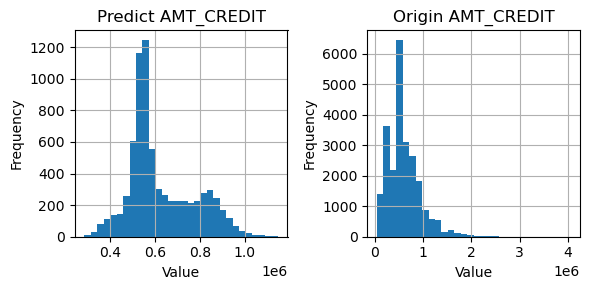

total_columns : 38
numeric_columns : 7
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 23
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag']
missing_values : 8
['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
16851
Epoch 1/32
422/422 - 2s - loss: 1.1707 - mean_squared_error: 1.1125 - val_loss: 0.6479 - val_mean_squared_error: 0.5952 - 2s/epoch - 

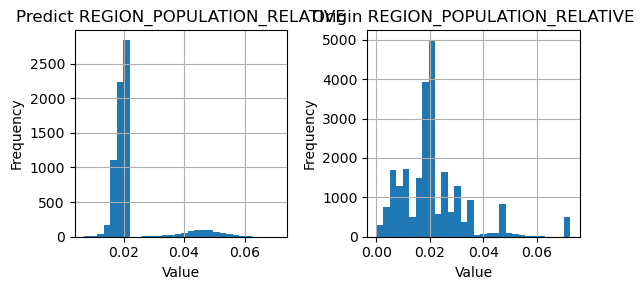

total_columns : 39
numeric_columns : 8
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 24
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag']
missing_values : 7
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
19251
Epoch 1/32
482/482 - 2s - loss: 0.7274 - mean_squared_error: 0.6708 - val_loss: 0.5710 -

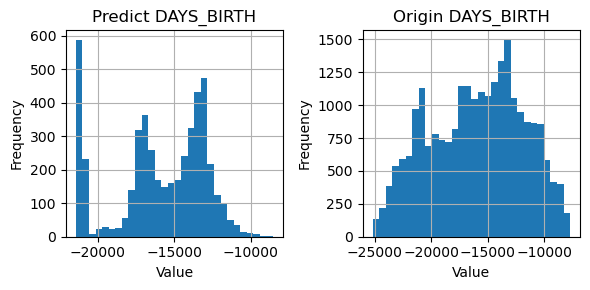

total_columns : 40
numeric_columns : 9
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 25
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag']
missing_values : 6
['DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
18146
Epoch 1/32
454/454 - 2s - loss: 0.9581 - mean_squared_error

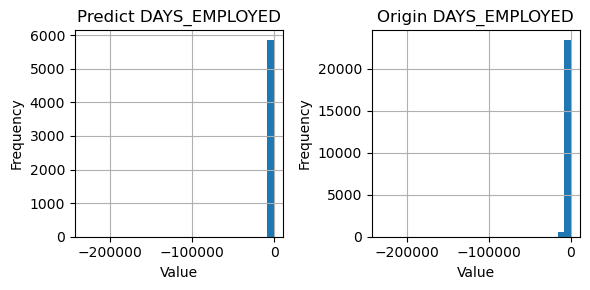

total_columns : 41
numeric_columns : 10
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 26
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag']
missing_values : 5
['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
14267
Epoch 1/32
357/357 - 2s - 

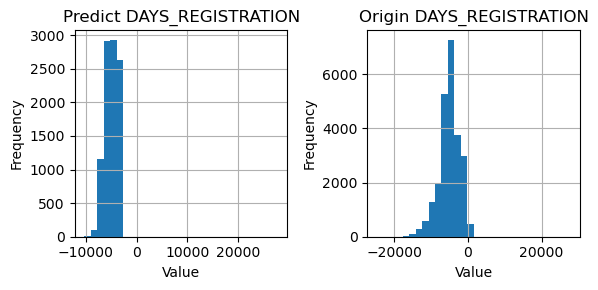

total_columns : 42
numeric_columns : 11
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 27
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag']
missing_values : 4
['DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24

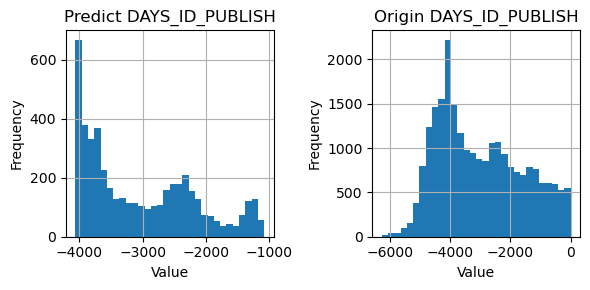

total_columns : 43
numeric_columns : 12
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 28
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag']
missing_values : 3
['CB_SCORE_

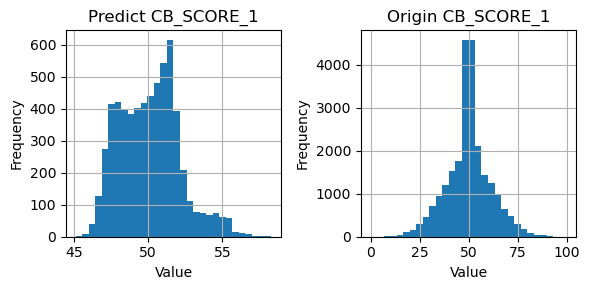

total_columns : 44
numeric_columns : 13
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'TARGET']
categorical_columns : 29
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

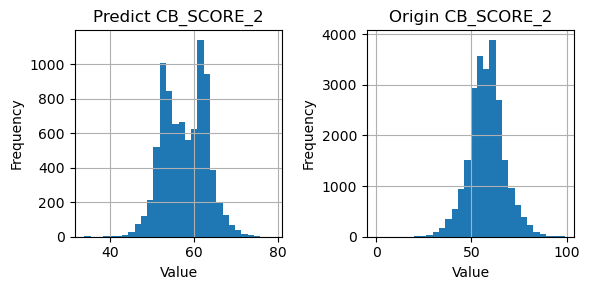

total_columns : 45
numeric_columns : 14
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'TARGET']
categorical_columns : 30
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'C

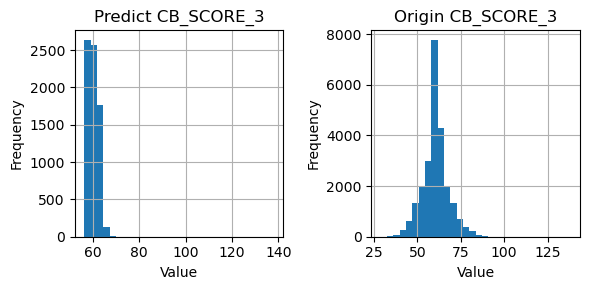

In [34]:
# 예측변수 다음예측에 사용
numeric_columns,categorical_columns,missing_values = columns_classification(data)
FILLED_DATA =fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=30, batch_size_val=32 )
numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
FILLED_DATA =fill_categorical(FILLED_DATA, numeric_columns, categorical_columns, target_col_val='FLAG_OWN_REALTY' ,epochs_val=30, batch_size_val=32 )

for i in range(len(missing_values)-1):
    numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
    FILLED_DATA =fill_numeric(FILLED_DATA, numeric_columns, categorical_columns, target_col_val=missing_values[0] ,epochs_val=32, batch_size_val=32 )

 

In [35]:
# OG_TYPE 예측 
FILLED_DATA = FILLED_DATA.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)
numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
FILLED_DATA =fill_categorical(FILLED_DATA, numeric_columns, categorical_columns, target_col_val='ORGANIZATION_TYPE' ,epochs_val=30, batch_size_val=32 )

total_columns : 46
numeric_columns : 26
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 19
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE

In [ ]:
# 예측변수 미사용
# # 예측변수를 사용하는 것이 유리하다는 결론

# numeric_columns,categorical_columns,missing_values = columns_classification(data)
# FILLED_DATA2 = data.copy()
# result =fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=30, batch_size_val=32 )
# FILLED_DATA2['CODE_GENDER'] = result['CODE_GENDER']
# result = fill_categorical(data, numeric_columns, categorical_columns, target_col_val='FLAG_OWN_REALTY' ,epochs_val=30, batch_size_val=32 )
# FILLED_DATA2['FLAG_OWN_REALTY'] = result['FLAG_OWN_REALTY']

# numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA2)

# for i in range(len(missing_values)):
#     result =fill_numeric(data, numeric_columns, categorical_columns, target_col_val=missing_values[i] ,epochs_val=32, batch_size_val=32 )
#     FILLED_DATA2[missing_values[i]] = result[missing_values[i]]
    
# 샘플로 확인    
# numeric_columns,categorical_columns,missing_values = columns_classification(data)
# result =fill_numeric(data, numeric_columns, categorical_columns, target_col_val='CB_SCORE_1' ,epochs_val=32, batch_size_val=32 )


### 단변량 분석 시각화

In [19]:

numeric_columns = data.select_dtypes(include=['int', 'float']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

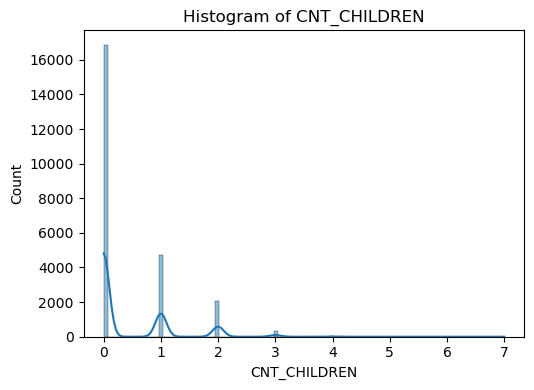

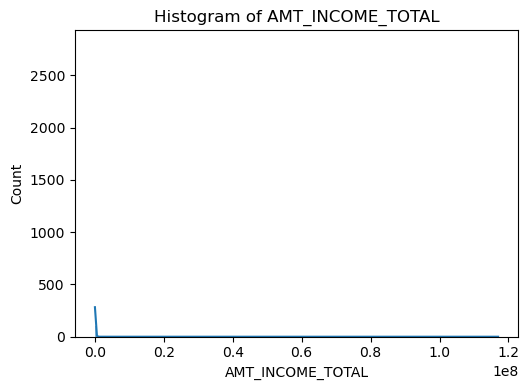

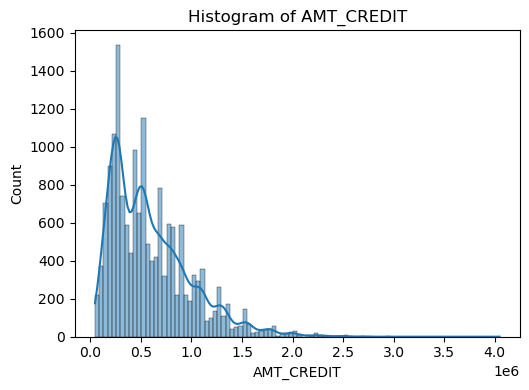

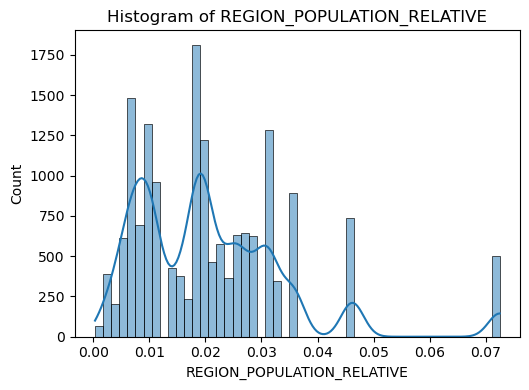

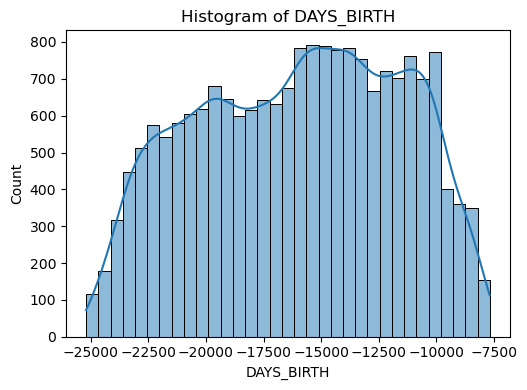

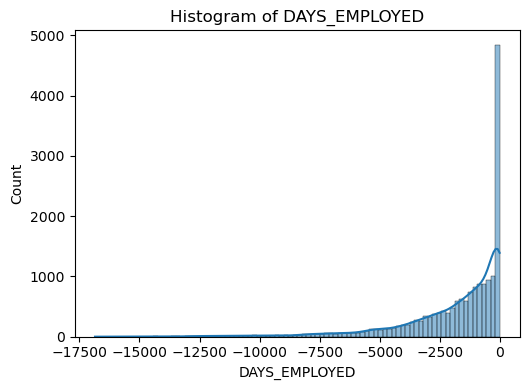

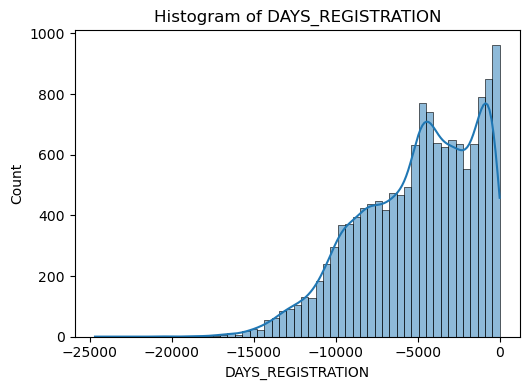

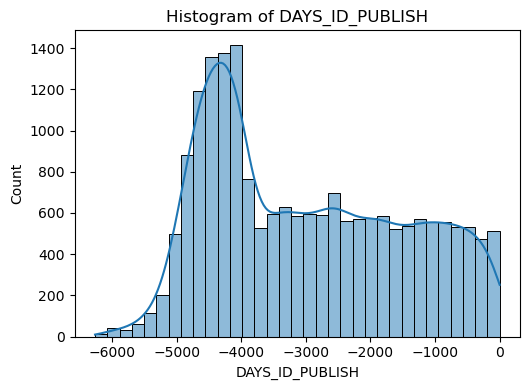

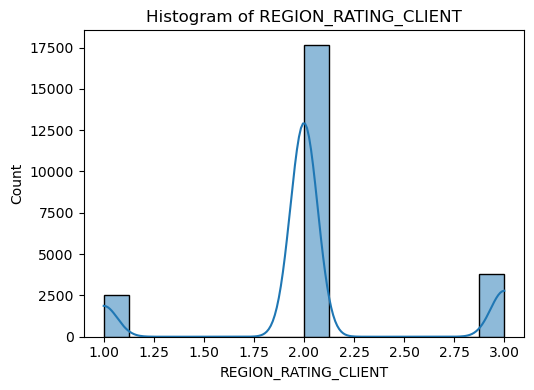

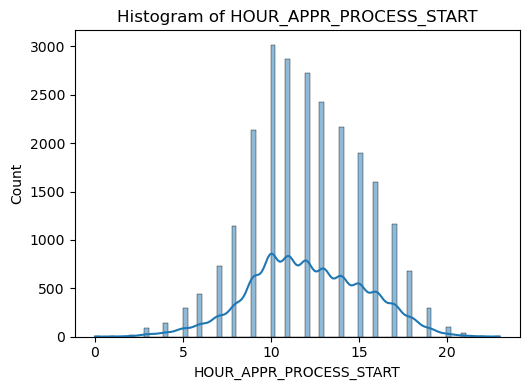

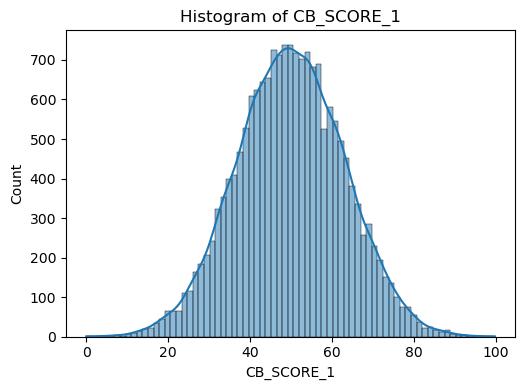

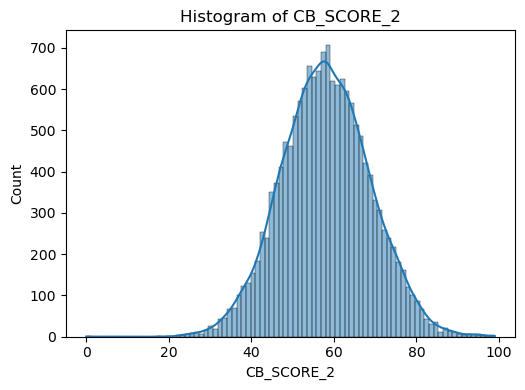

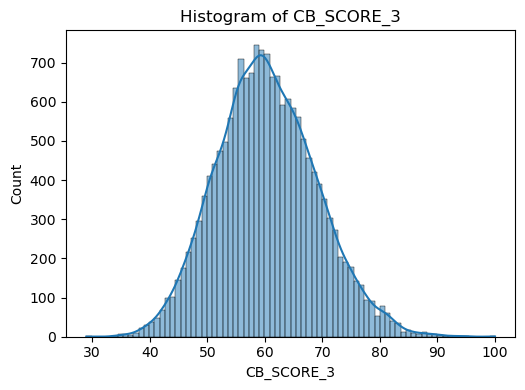

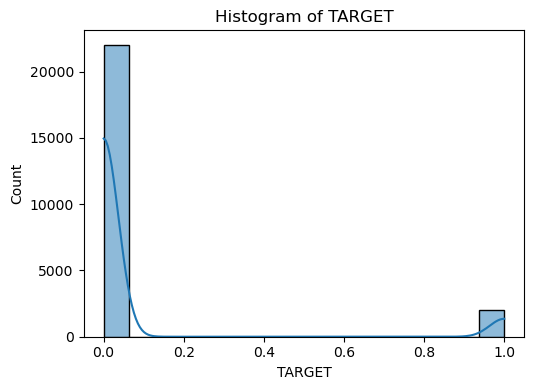

In [20]:
# 수치형 변수 시각화 (히스토그램과 상자 그림)
for column in numeric_columns[1:]:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

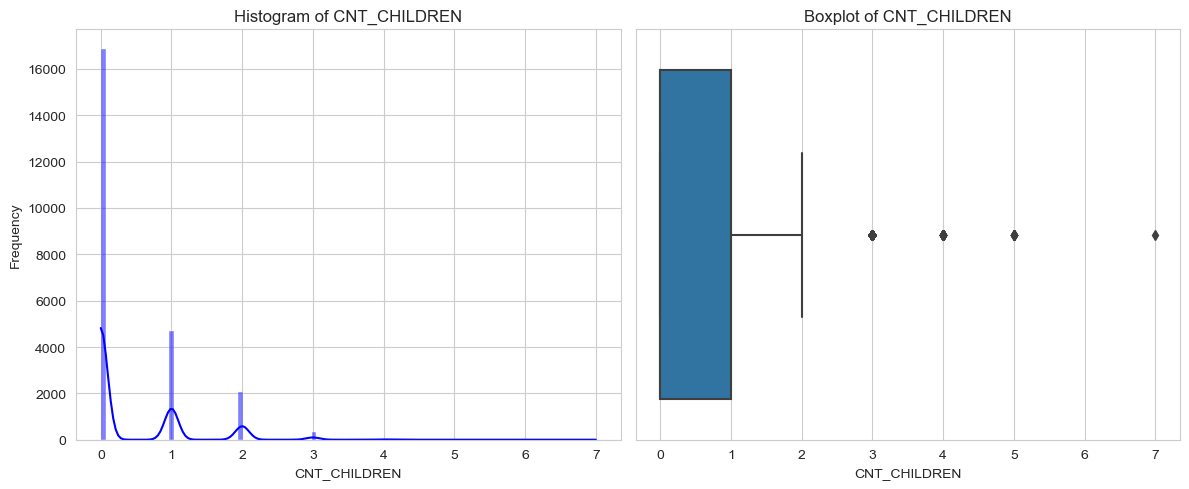

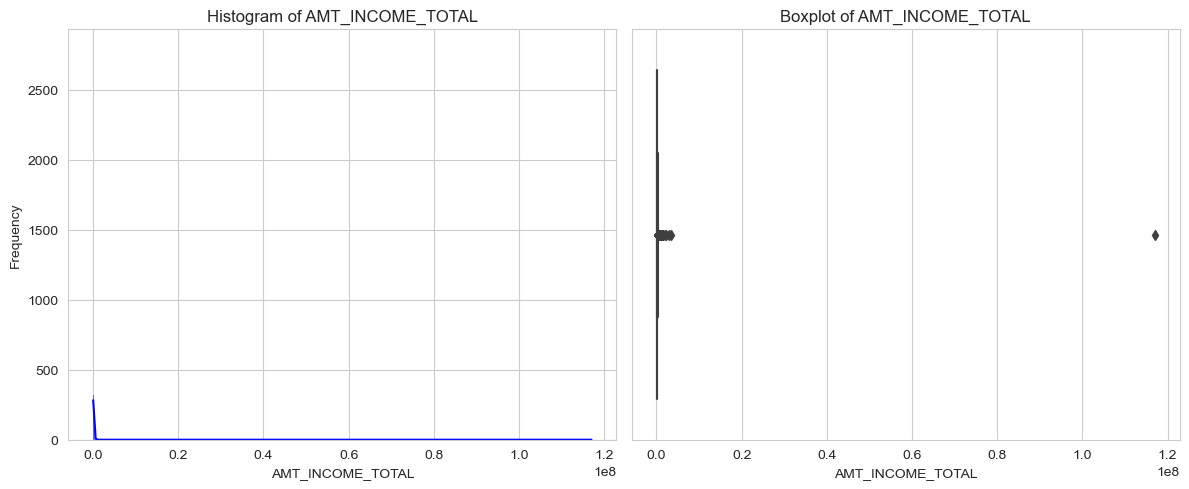

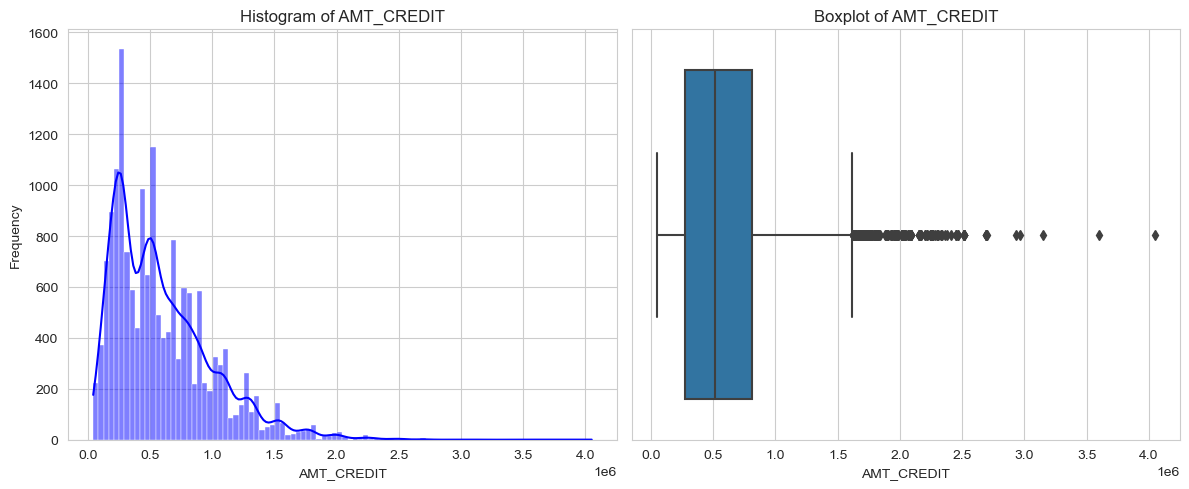

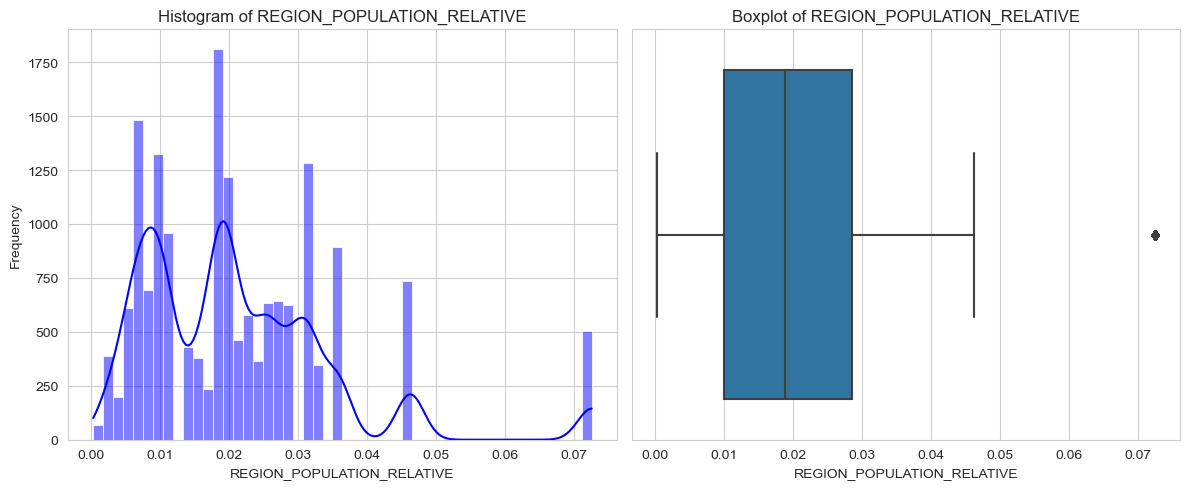

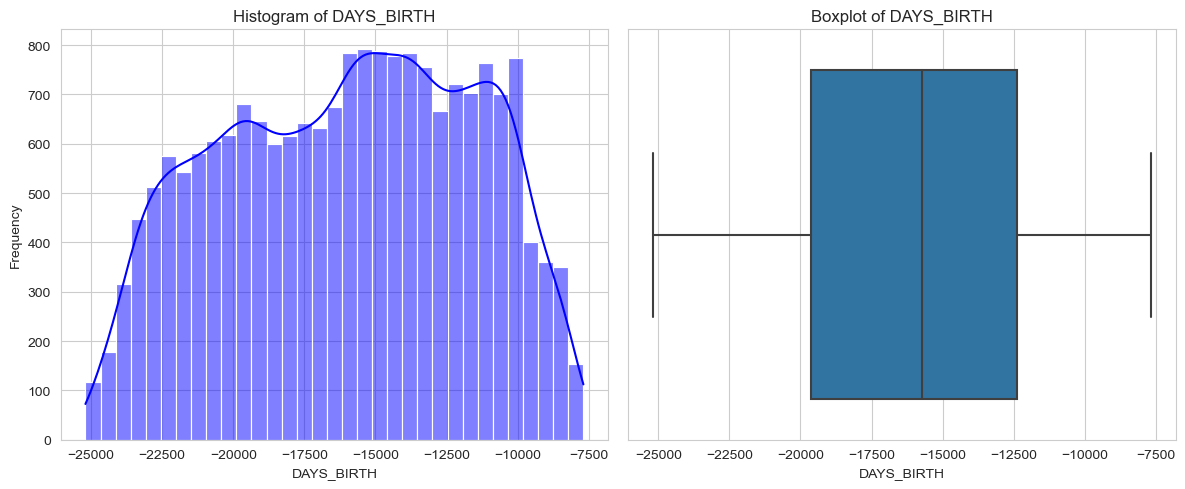

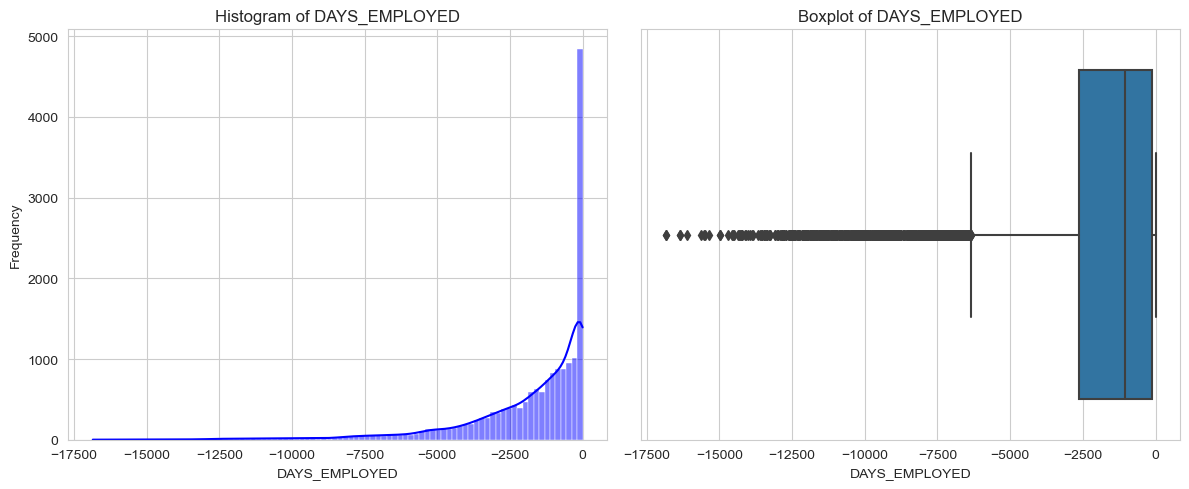

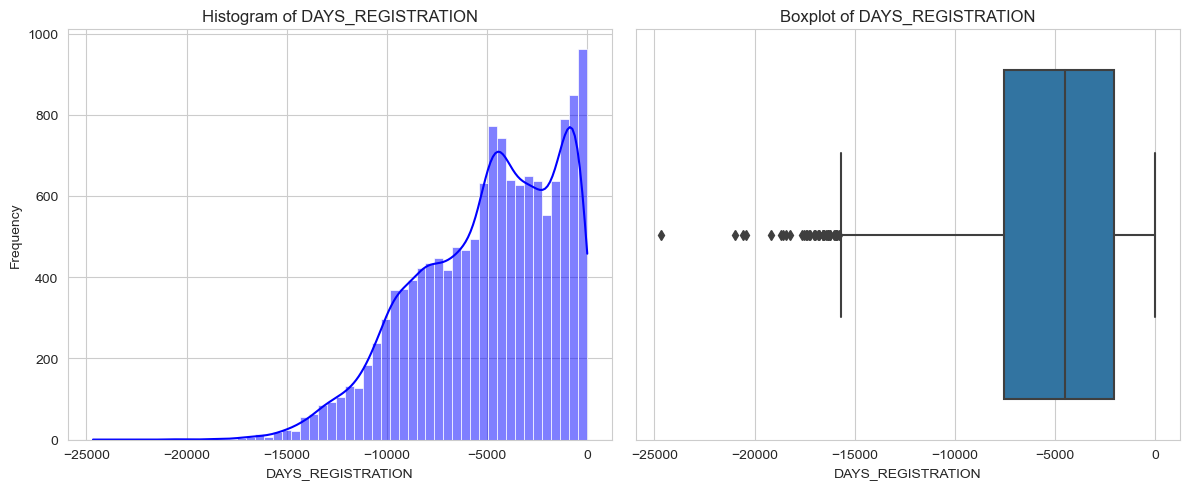

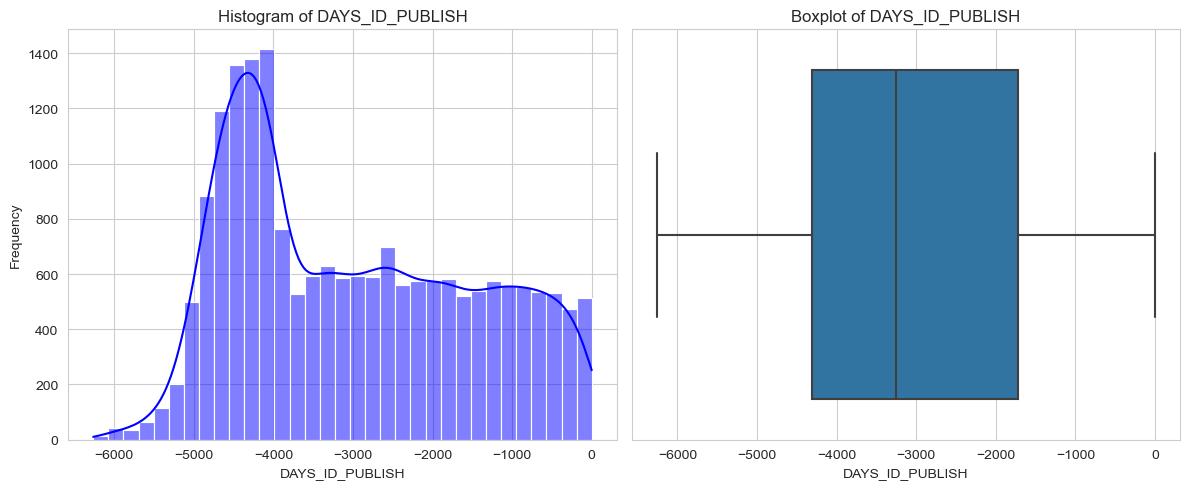

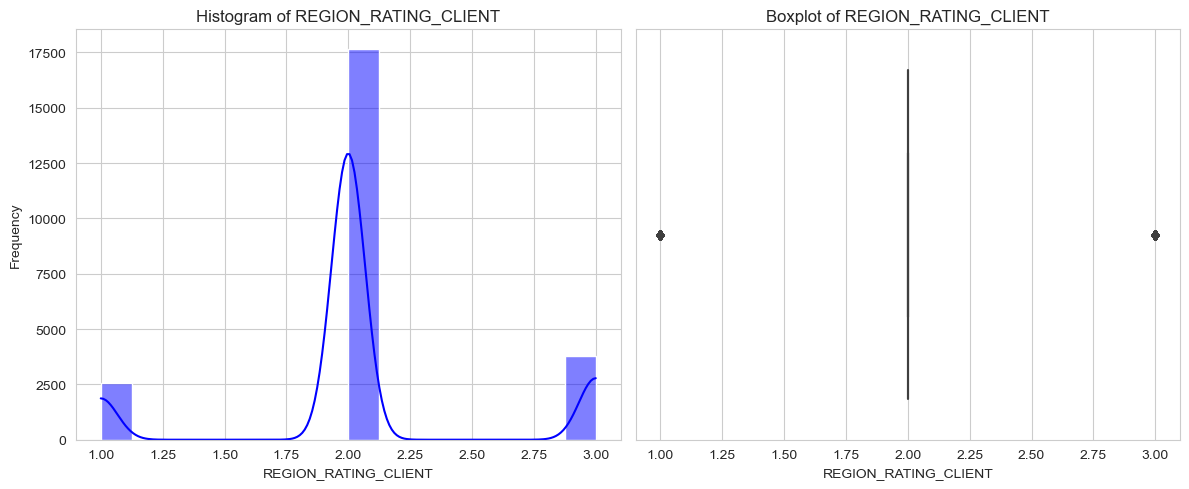

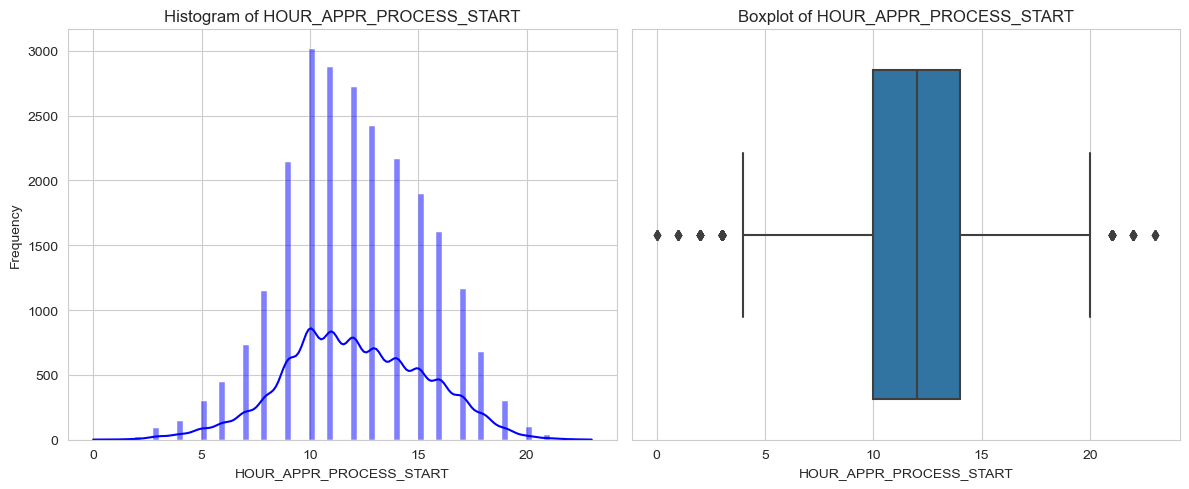

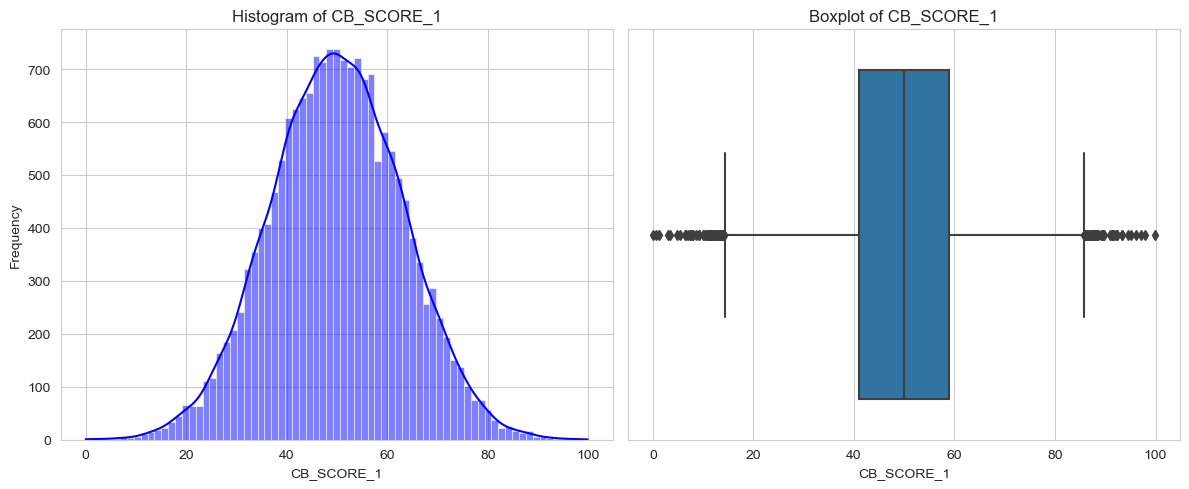

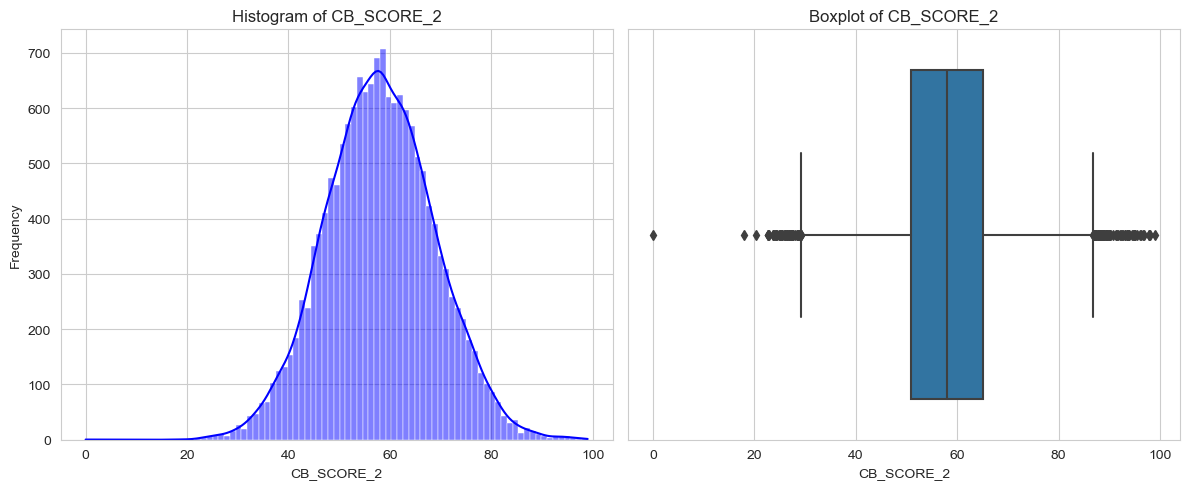

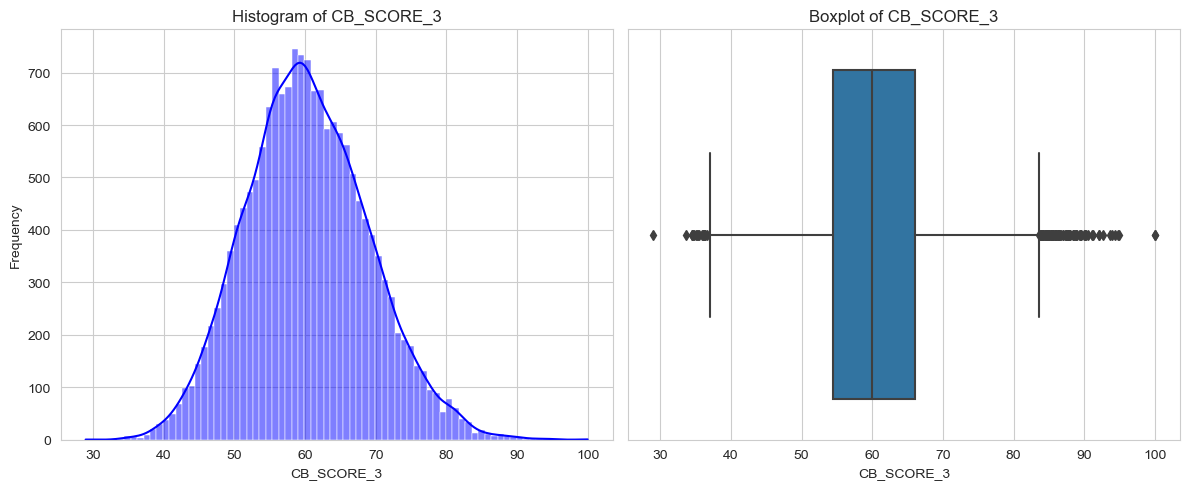

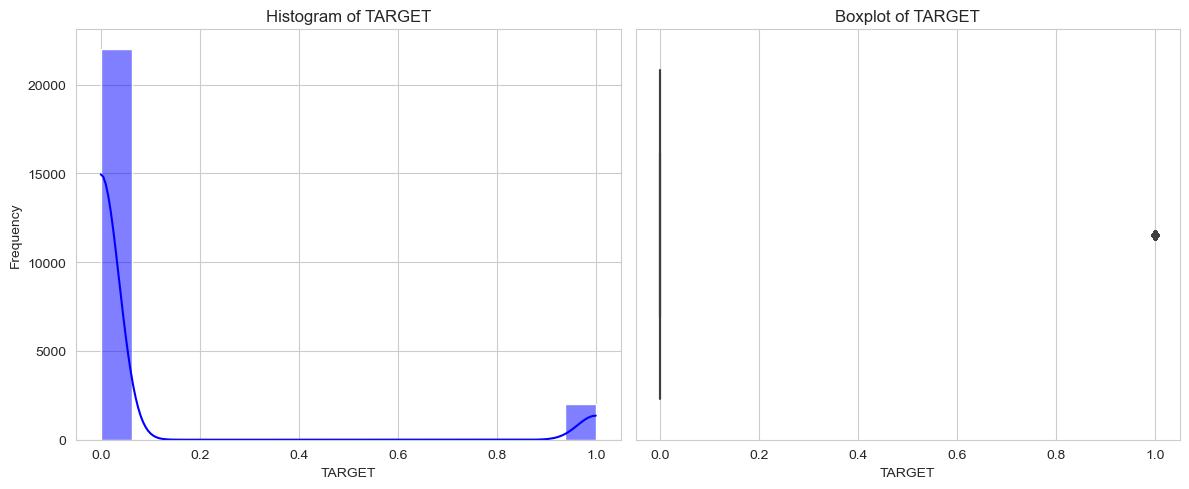

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
sns.set_style("whitegrid")  # 그리드를 추가한 흰 배경 스타일

custom_palette = ["blue", "red"]

for column in numeric_columns[1:]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # 히스토그램 그리기
    sns.histplot(data=data, x=column, kde=True, ax=axes[0], color=custom_palette[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # 상자 그림 그리기
    sns.boxplot(data=data, x=column, ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

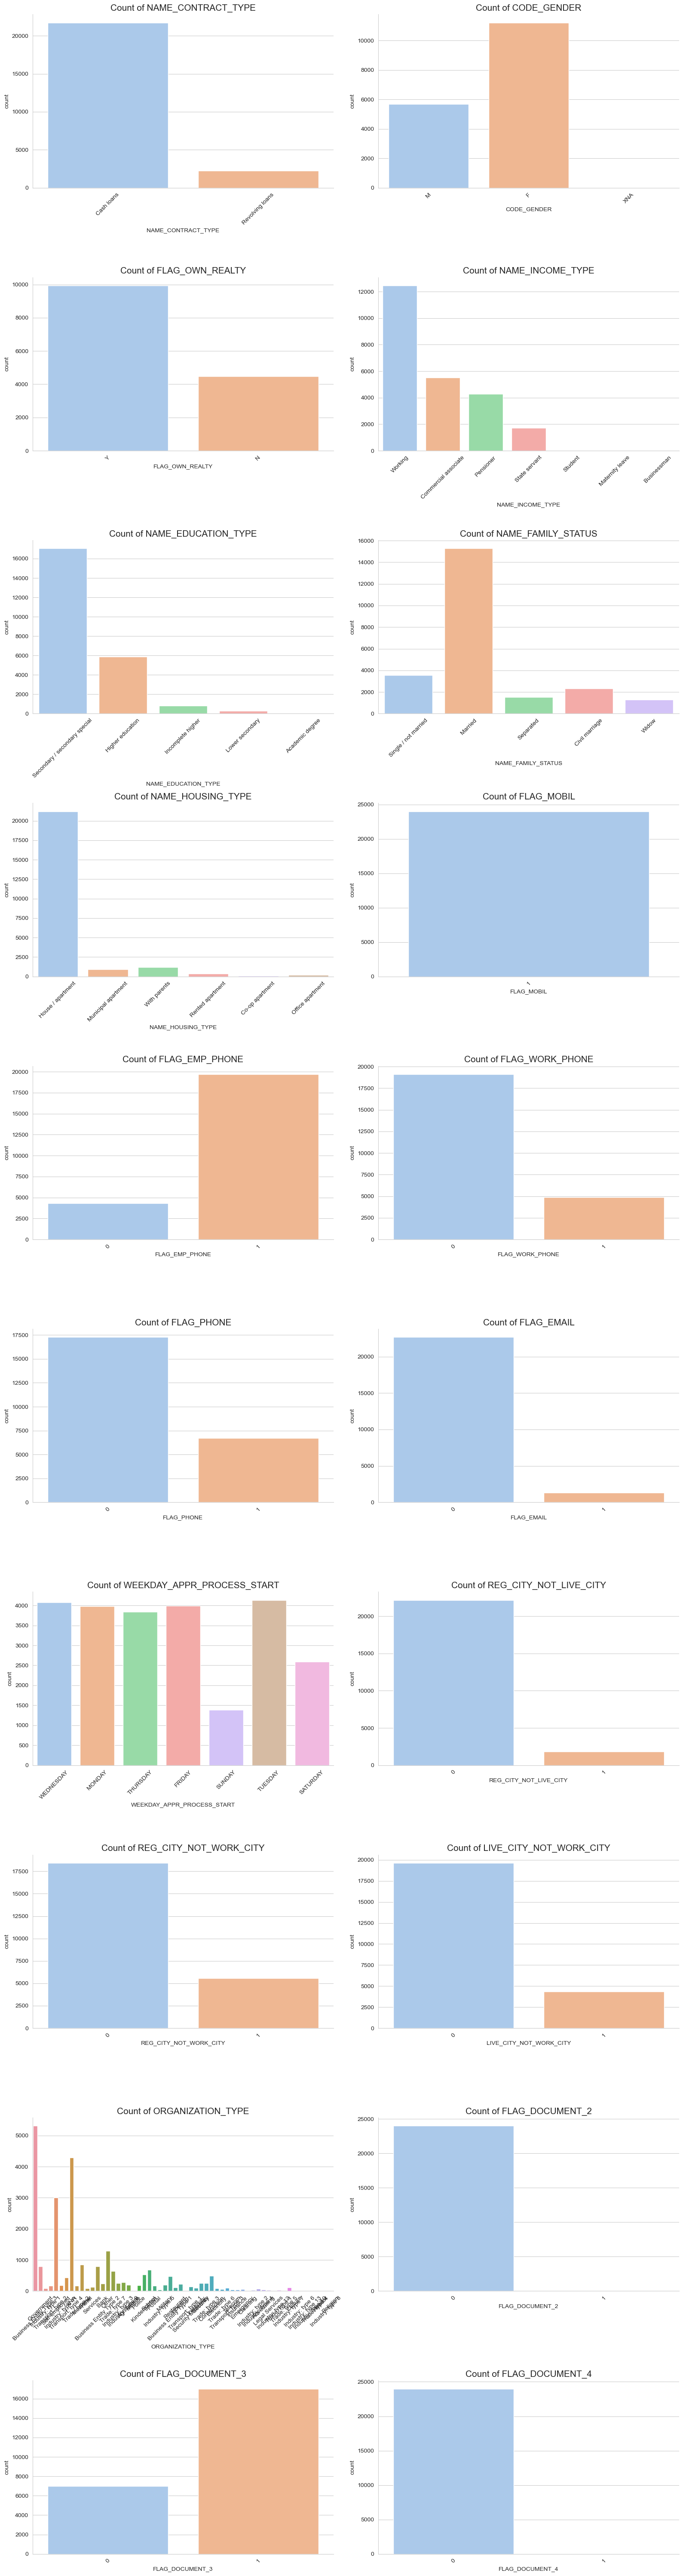

In [22]:
# 범주형 변수 시각화 (막대 그래프)

sns.set_style("whitegrid")
sns.set_palette("pastel")


# Calculate the number of rows needed for the plot
n_rows = (len(categorical_columns) + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows*6))

for idx in range(n_rows * 2):
    i = idx // 2
    j = idx % 2
    
    # Skip if there's no data for this subplot
    if idx >= len(categorical_columns):
        fig.delaxes(axes[i,j]) # delete the empty subplot
        continue
    
    column = categorical_columns[idx]
    
    # Create the countplot on designated subplot (axes[i,j])
    sns.countplot(x=data[column], data=data, ax=axes[i,j])
    
    # Set the title and labels of the graph
    axes[i,j].set_title(f'Count of {column}', fontsize=15)
    
    # Rotate x-axis labels for better visibility if necessary
    axes[i,j].tick_params(axis='x', rotation=45)

# Remove top and right borders for cleaner look & adjust layout for better visibility 
sns.despine()
plt.tight_layout()

plt.show()

## 파생변수 만들기

In [67]:
FILLED_DATA_ADJ = FILLED_DATA.copy()

In [68]:
FILLED_DATA_ADJ['AGE'] = round(FILLED_DATA_ADJ['DAYS_BIRTH'] / 365)*-1
FILLED_DATA_ADJ['AGE']

0        26.0
1        52.0
2        35.0
3        31.0
4        47.0
         ... 
23995    52.0
23996    33.0
23997    45.0
23998    38.0
23999    35.0
Name: AGE, Length: 24000, dtype: float64

In [69]:
FILLED_DATA_ADJ['YEARS_EMPLOYED'] = round(FILLED_DATA_ADJ['DAYS_EMPLOYED'] / 365)*-1
FILLED_DATA_ADJ['YEARS_EMPLOYED']

0         2.0
1        11.0
2         4.0
3         2.0
4         1.0
         ... 
23995    -0.0
23996     5.0
23997     6.0
23998     9.0
23999     5.0
Name: YEARS_EMPLOYED, Length: 24000, dtype: float64

In [70]:
FILLED_DATA_ADJ['DAYS_REGISTRATION_MONTH'] = round(FILLED_DATA_ADJ['DAYS_REGISTRATION'] / 30)*-1
FILLED_DATA_ADJ['DAYS_REGISTRATION_MONTH']

0        122.0
1        142.0
2        141.0
3          4.0
4        208.0
         ...  
23995    190.0
23996      4.0
23997    156.0
23998    122.0
23999    146.0
Name: DAYS_REGISTRATION_MONTH, Length: 24000, dtype: float64

In [72]:
FILLED_DATA_ADJ['MONTH_EMPLOYED'] = round(FILLED_DATA_ADJ['DAYS_EMPLOYED'] / 30)*-1
FILLED_DATA_ADJ['MONTH_EMPLOYED']

0         21.0
1        128.0
2         51.0
3         25.0
4         16.0
         ...  
23995     -0.0
23996     56.0
23997     78.0
23998    113.0
23999     61.0
Name: MONTH_EMPLOYED, Length: 24000, dtype: float64

In [73]:
FILLED_DATA_ADJ['DAYS_ID_PUBLISH_YEARS'] = round(FILLED_DATA_ADJ['DAYS_ID_PUBLISH'] / 30)*-1
FILLED_DATA_ADJ['DAYS_ID_PUBLISH_YEARS']

0         71.0
1         84.0
2        129.0
3        102.0
4         17.0
         ...  
23995     89.0
23996     97.0
23997    136.0
23998    160.0
23999      1.0
Name: DAYS_ID_PUBLISH_YEARS, Length: 24000, dtype: float64

In [65]:
# 국내 DSR과 유사한 개념


FILLED_DATA_ADJ['ANNUITY_INCOME_PERCENT'] = (FILLED_DATA_ADJ['AMT_CREDIT'] / FILLED_DATA_ADJ['AMT_INCOME_TOTAL']) * 10
FILLED_DATA_ADJ['ANNUITY_INCOME_PERCENT']

0        28.195213
1        20.000000
2        47.185417
3        43.738380
4        29.834667
           ...    
23995    42.363778
23996    72.672000
23997    73.751333
23998    39.366250
23999    19.445551
Name: ANNUITY_INCOME_PERCENT, Length: 24000, dtype: float64

In [83]:
FILLED_DATA_ADJ['AVG_CB_SCORE'] = (FILLED_DATA_ADJ['CB_SCORE_1'] + FILLED_DATA_ADJ['CB_SCORE_2'] + FILLED_DATA_ADJ['CB_SCORE_3'])/3
FILLED_DATA_ADJ['AVG_CB_SCORE']

0        56.185796
1        43.511234
2        58.157662
3        65.688910
4        60.411976
           ...    
23995    58.832131
23996    61.005781
23997    48.194744
23998    53.636358
23999    59.888877
Name: AVG_CB_SCORE, Length: 24000, dtype: float64

In [94]:
FILLED_DATA_ADJ['CUST_REG_INFO_FLAG'] = FILLED_DATA_ADJ['FLAG_EMP_PHONE'] | FILLED_DATA_ADJ['FLAG_WORK_PHONE'] | FILLED_DATA_ADJ['FLAG_PHONE'] | FILLED_DATA_ADJ['FLAG_EMAIL']
FILLED_DATA_ADJ

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,CB_SCORE_2_predicted_flag,CB_SCORE_3_predicted_flag,ORGANIZATION_TYPE_predicted_flag,AGE,YEARS_EMPLOYED,DAYS_REGISTRATION_MONTH,MONTH_EMPLOYED,DAYS_ID_PUBLISH_YEARS,AVG_CB_SCORE,CUST_REG_INFO_FLAG
0,100002,Cash loans,M,Y,0,202500.0,5.709531e+05,Working,Secondary / secondary special,Single / not married,...,Y,N,N,26.0,2.0,122.0,21.0,71.0,56.185796,1
1,100004,Revolving loans,F,Y,0,67500.0,1.350000e+05,Working,Secondary / secondary special,Single / not married,...,N,N,N,52.0,11.0,142.0,128.0,84.0,43.511234,1
2,100020,Cash loans,M,N,0,108000.0,5.096025e+05,Working,Secondary / secondary special,Married,...,N,Y,N,35.0,4.0,141.0,51.0,129.0,58.157662,1
3,100029,Cash loans,M,N,2,135000.0,5.904681e+05,Working,Secondary / secondary special,Married,...,N,N,N,31.0,2.0,4.0,25.0,102.0,65.688910,1
4,100048,Cash loans,M,Y,0,202500.0,6.041520e+05,Working,Secondary / secondary special,Married,...,Y,Y,N,47.0,1.0,208.0,16.0,17.0,60.411976,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,456095,Cash loans,F,Y,0,135000.0,5.719110e+05,Pensioner,Higher education,Married,...,N,N,Y,52.0,-0.0,190.0,-0.0,89.0,58.832131,0
23996,456117,Cash loans,F,N,1,67500.0,4.905360e+05,Working,Secondary / secondary special,Married,...,Y,N,N,33.0,5.0,4.0,56.0,97.0,61.005781,1
23997,456118,Cash loans,M,Y,0,135000.0,9.956430e+05,Working,Higher education,Married,...,Y,N,N,45.0,6.0,156.0,78.0,136.0,48.194744,1
23998,456142,Cash loans,F,Y,1,360000.0,1.417185e+06,Working,Higher education,Single / not married,...,Y,N,N,38.0,9.0,122.0,113.0,160.0,53.636358,1


In [104]:
FILLED_DATA_ADJ['IS_SINGLE_PARENT'] = 'N'
FILLED_DATA_ADJ.loc[((FILLED_DATA_ADJ['NAME_FAMILY_STATUS'] == 'Single / not married') | 
                     (FILLED_DATA_ADJ['NAME_FAMILY_STATUS'] == 'Widow')) & 
                     (FILLED_DATA_ADJ['CNT_CHILDREN'] > 0), 'IS_SINGLE_PARENT'] = 'Y'
FILLED_DATA_ADJ['IS_SINGLE_PARENT']

0        N
1        N
2        N
3        N
4        N
        ..
23995    N
23996    N
23997    N
23998    Y
23999    N
Name: IS_SINGLE_PARENT, Length: 24000, dtype: object

In [111]:
FILLED_DATA_ADJ['MIN_CB_SCORE'] =FILLED_DATA_ADJ[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].min(axis=1)
FILLED_DATA_ADJ['MIN_CB_SCORE']

0        54.991123
1        26.499494
2        51.939556
3        45.996152
4        56.166794
           ...    
23995    55.568876
23996    51.115667
23997    40.231662
23998    50.466423
23999    50.173294
Name: MIN_CB_SCORE, Length: 24000, dtype: float64

In [114]:
FILLED_DATA_ADJ['MEDIAN_CB_SCORE'] =FILLED_DATA_ADJ[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].median(axis=1)
FILLED_DATA_ADJ['MEDIAN_CB_SCORE']

0        55.217041
1        46.433666
2        59.037060
3        68.694333
4        58.869148
           ...    
23995    56.609319
23996    52.096806
23997    51.533905
23998    50.734878
23999    58.329626
Name: MEDIAN_CB_SCORE, Length: 24000, dtype: float64

In [115]:
FILLED_DATA_ADJ['STD_CB_SCORE'] =FILLED_DATA_ADJ[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].std(axis=1)
FILLED_DATA_ADJ['STD_CB_SCORE']

0         1.876986
1        15.755134
2         5.828378
3        18.375316
4         5.191480
           ...    
23995     4.779470
23996    16.287879
23997     6.926085
23998     5.259713
23999    10.581722
Name: STD_CB_SCORE, Length: 24000, dtype: float64

In [141]:
FILLED_DATA_ADJ = FILLED_DATA_ADJ.astype({'CUST_REG_INFO_FLAG': object, })

# 최종 생성 모델

## DNN 딥러닝 방식

In [164]:
numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)


total_columns : 47
numeric_columns : 26
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 21
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predi

### 연체 고객을 맞추는 것이 더 중요함으로 모델 튜닝
 
#### loss 함수 변경, class 가중치 부여, Threshold 값 수정

In [203]:
from sklearn.utils import class_weight
# Compute the class weights
class_weights = class_weight.compute_class_weight(class_weight= 'balanced', classes=np.unique(y_train), y=y_train)

class_weights[1] = class_weights[1] * 1.2

In [204]:
class_weights = {i: val for i, val in enumerate(class_weights)}
class_weights

{0: 0.5452775073028238, 1: 7.225806451612903}

In [221]:
# weight주는건데 수정해보기
from tensorflow import keras


def custom_loss(y_true, y_pred):
    # Calculate binary crossentropy loss
    bce = keras.losses.BinaryCrossentropy()
    base_loss = bce(y_true, y_pred)
    
    # Define weight for false positives
    fp_weight = 2.0
    
    # Add extra penalty for false positives
    y_pred_rounded = K.round(y_pred)
    fp_penalty = fp_weight * K.mean(K.cast(1 - y_true, 'float32') * K.cast(y_pred_rounded, 'float32'))
    
    return base_loss + fp_penalty

In [191]:
import tensorflow.keras.backend as K

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [192]:

from sklearn.compose import make_column_transformer

# 안쓸 컬럼 정의
columns_to_exclude = ['SK_ID_CURR','TARGET']

input_numeric_columns = [x for x in numeric_columns if x not in columns_to_exclude]
input_numeric_columns

# Preprocessing for numerical data:
numerical_transformer = StandardScaler()

# Preprocessing for categorical data:
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = make_column_transformer(
    (numerical_transformer, input_numeric_columns),
    (categorical_transformer, categorical_columns)
)

X = FILLED_DATA[input_numeric_columns + categorical_columns]
y = FILLED_DATA['TARGET']



X_train_preprocessed= preprocessor.fit_transform(X)

X_train_dense = X_train_preprocessed.toarray()



X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_train_dense,y,test_size=0.3)




n_input_features=X_train_dense.shape[1]

In [162]:
# AUC METRIC만 출력

dnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(n_input_features,)),
    tf.keras.layers.Dense(65, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 선형 활성화 함수 사용
])
dnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC()])


In [ ]:
# 다양한 METRIC 출력, metric 파라미터는 학습에 영향을 주지 않음을 확인함.
# 학습에 영향을 주고 싶다면 3가지 방안이 있음 
# loss 함수 변경, class 가중치 부여, Threshold 값 수정
#loss=custom_loss,


dnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(n_input_features,)),
    tf.keras.layers.Dense(65, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 선형 활성화 함수 사용
])
dnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', specificity])


In [224]:


dnn_model.fit(X_train_full, y_train,class_weight=class_weights, batch_size=10, epochs=20,
                  validation_data=(X_valid_full, y_valid), verbose=2, )

Epoch 1/20
1680/1680 - 4s - loss: 0.4855 - accuracy: 0.9148 - auc: 0.6083 - specificity: 0.9973 - val_loss: 0.3392 - val_accuracy: 0.9169 - val_auc: 0.6864 - val_specificity: 1.0000 - 4s/epoch - 2ms/step
Epoch 2/20
1680/1680 - 3s - loss: 0.4291 - accuracy: 0.9170 - auc: 0.6787 - specificity: 1.0000 - val_loss: 0.3063 - val_accuracy: 0.9169 - val_auc: 0.7052 - val_specificity: 1.0000 - 3s/epoch - 2ms/step
Epoch 3/20
1680/1680 - 3s - loss: 0.4131 - accuracy: 0.9170 - auc: 0.6959 - specificity: 1.0000 - val_loss: 0.2957 - val_accuracy: 0.9169 - val_auc: 0.7047 - val_specificity: 1.0000 - 3s/epoch - 2ms/step
Epoch 4/20
1680/1680 - 3s - loss: 0.4055 - accuracy: 0.9170 - auc: 0.7054 - specificity: 1.0000 - val_loss: 0.2807 - val_accuracy: 0.9169 - val_auc: 0.7084 - val_specificity: 1.0000 - 3s/epoch - 2ms/step
Epoch 5/20
1680/1680 - 3s - loss: 0.4004 - accuracy: 0.9170 - auc: 0.7108 - specificity: 1.0000 - val_loss: 0.2923 - val_accuracy: 0.9169 - val_auc: 0.7046 - val_specificity: 1.0000 - 

225/225 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

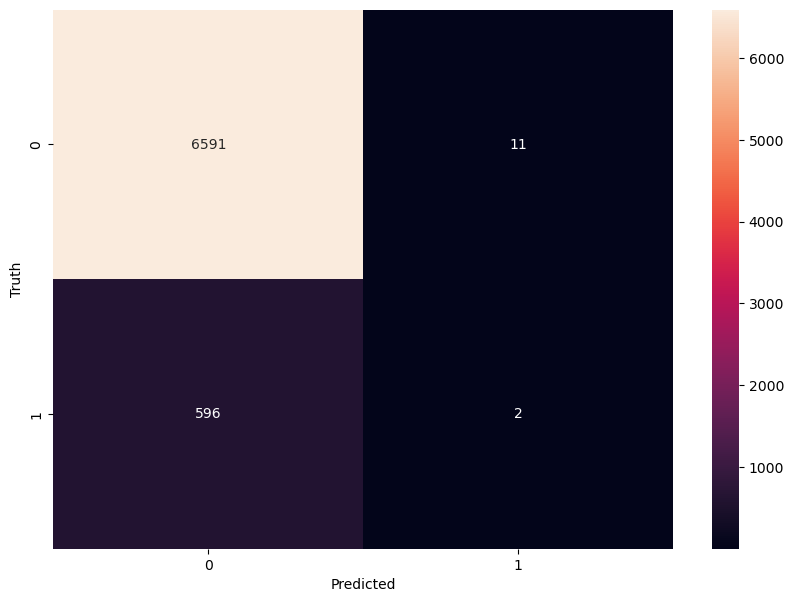

In [225]:
from sklearn.metrics import confusion_matrix
predictions = dnn_model.predict(X_valid_full)
predicted_classes = (predictions > 0.5).astype(int)
predicted_classes

cm = confusion_matrix(y_valid, predicted_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Randomforest

In [107]:

from sklearn.compose import make_column_transformer

# 안쓸 컬럼 정의
columns_to_exclude = ['SK_ID_CURR','TARGET']

input_numeric_columns = [x for x in numeric_columns if x not in columns_to_exclude]
input_numeric_columns


X = FILLED_DATA_ADJ[input_numeric_columns + categorical_columns].copy()

# 범주형 변수 인코딩
encoder = LabelEncoder()
for col in categorical_columns:
    print(col)
    X[col] = encoder.fit_transform(X[col])

# 데이터 스케일링
scaler = StandardScaler()
X[input_numeric_columns] = scaler.fit_transform(X[input_numeric_columns])


# Split data into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3)




NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_REALTY
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
CODE_GENDER_predicted_flag
FLAG_OWN_REALTY_predicted_flag
AMT_CREDIT_predicted_flag
REGION_POPULATION_RELATIVE_predicted_flag
DAYS_BIRTH_predicted_flag
DAYS_EMPLOYED_predicted_flag
DAYS_REGISTRATION_predicted_flag
DAYS_ID_PUBLISH_predicted_flag
CB_SCORE_1_predicted_flag
CB_SCORE_2_predicted_flag
CB_SCORE_3_predicted_flag
ORGANIZATION_TYPE_predicted_flag


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier


# Train a RandomForest model
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train,y_train)

# Train a SVM model
svm_model=SVC()
svm_model.fit(X_train,y_train)

# Train a LightGBM model
lgbm_model=LGBMClassifier()
lgbm_model.fit(X_train,y_train)



LGBMClassifier()

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assume that y_valid are the true labels and y_pred are the predicted labels.
y_pred_rf = random_forest_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_dnn = predicted_classes




models = ['Random Forest', 'SVM', 'lgbm', 'dnn']
predictions = [y_pred_rf, y_pred_svm, y_pred_lgbm,  y_pred_dnn]

for i,model in enumerate(models):
    print(f"Model: {model}")
    print("Accuracy:", accuracy_score(y_valid,predictions[i]))
    print("Precision:", precision_score(y_valid,predictions[i]))
    print("Recall:", recall_score(y_valid,predictions[i]))
    print("F1-Score:", f1_score(y_valid,predictions[i]))
    # For AUC-ROC score we need probability estimates of the positive class
    # Not all models have a predict_proba method (like SVC), hence we check if it exists
    if hasattr(eval(model.lower().replace(' ', '_')+'_model'), "predict_proba"):
        print("AUC-ROC:", roc_auc_score(y_valid,
              eval(model.lower().replace(' ', '_')+'_model').predict_proba(X_test)[:, 1]))
        print()

Model: Random Forest
Accuracy: 0.8676388888888888
Precision: 0.08351648351648351
Recall: 0.06620209059233449
F1-Score: 0.0738581146744412
AUC-ROC: 0.4907207484821172

Model: SVM
Accuracy: 0.9201388888888888
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Model: lgbm
Accuracy: 0.8902777777777777
Precision: 0.09701492537313433
Recall: 0.04529616724738676
F1-Score: 0.06175771971496437
AUC-ROC: 0.48204833456208307

Model: dnn
Accuracy: 0.9197222222222222
Precision: 0.25
Recall: 0.003484320557491289
F1-Score: 0.006872852233676975


Text(35.22222222222222, 0.5, 'Truth')

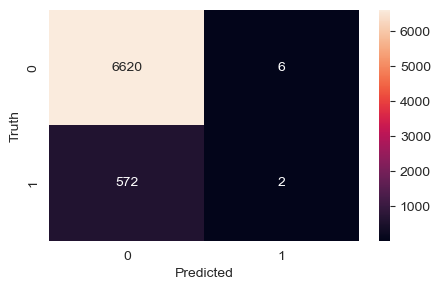

In [110]:
cm = confusion_matrix(y_valid, predicted_classes)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

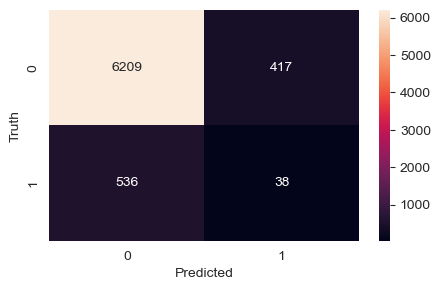

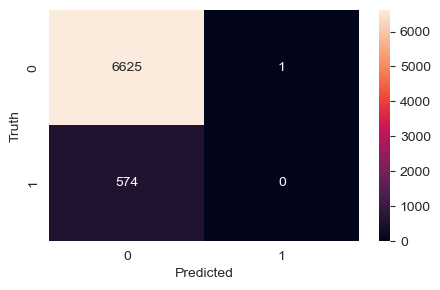

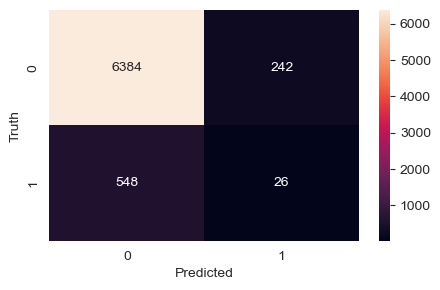

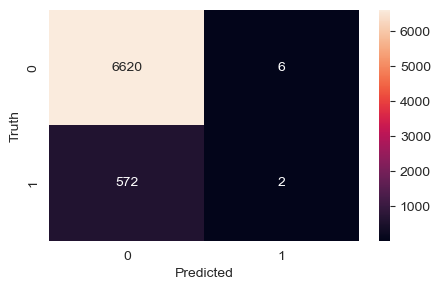

In [111]:
for i in predictions:
    cm = confusion_matrix(y_valid, i)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')